In [3]:
import pandas as pd
from sklearn.svm import SVR 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
data=df.drop(['category','parameter','mode','unit'], axis=1)
# converting value column to a more usable log.
data['log_value'] = data['value'].apply(lambda x: np.log(x))
df=data
encoded_data = pd.get_dummies(data, columns=['region', 'powertrain'])
x = encoded_data.drop(['log_value','value'], axis=1)
y = encoded_data[['log_value']]
x = encoded_data.drop(['log_value','value'], axis=1)
y = encoded_data[['log_value']]
model = SVR(kernel= 'linear')
model.fit(x,y)
# prediction of training data
train_prediction=model.predict(x)
#checking error of linear model with previous values
from sklearn import metrics

# Create DataFrame of predicted values
train_prediction = pd.DataFrame(train_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
train_prediction['value'] = train_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)
# R squared Error
error_score = metrics.r2_score(data['value'], train_prediction['value'])
print("R squared Error : ", error_score)
error_score = np.sqrt(mean_squared_error(data['value'], train_prediction['value']))
print("Root Mean Squared Error (RMSE):", error_score)

c:\Users\risha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R squared Error :  0.8555164733034619
Root Mean Squared Error (RMSE): 154701.68596742657


In [14]:
future_data=pd.DataFrame({'year': [2023,2024,2025],
             'region': ['India','India','India'],
             'powertrain': ['BEV','BEV','BEV']})

# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)
# Predict the values for future years
future_prediction = model.predict(encoded_future_data)
# Create DataFrame of predicted values
future_prediction = pd.DataFrame(future_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
future_prediction['value'] = future_prediction['log_values'].apply(lambda x: np.exp(x))
future_prediction

,log_values,value
0,10.208864,27142.725408
1,10.711167,44853.932907
2,11.213469,74122.079597


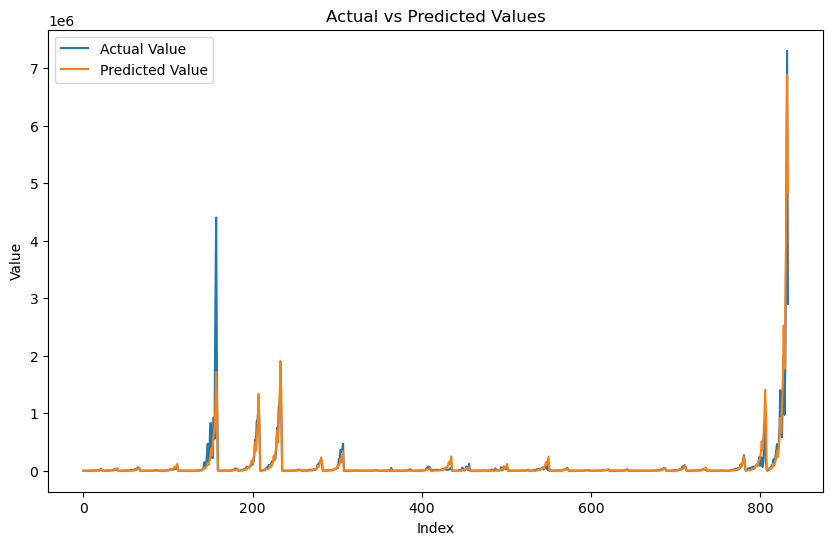

In [15]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Actual Value')
plt.plot(data.index, train_prediction['value'], label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

seperating BEV and PHEV

In [12]:
# Filter the DataFrame by powertrain for finding value using model for each PHEV and BEV
df_x_PHEV = data[data['powertrain'] == 'PHEV']
df_x_BEV = data[data['powertrain'] == 'BEV']

In [17]:
#finding prediction for previous years using model for PHEV and BEV seperately.
encoded_data_BEV = pd.get_dummies(df_x_BEV, columns=['region', 'powertrain'])
encoded_data_BEV
x_BEV = encoded_data_BEV.drop(['log_value','value'], axis=1)
y_BEV = encoded_data_BEV[['log_value']]
x_BEV['powertrain_PHEV']=fill_value=0
prev_data_predict_BEV= model.predict(x_BEV)
prev_data_predict_BEV.shape
x_BEV

,year,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,region_Denmark,region_EU27,...,region_South Africa,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Kingdom,region_World,powertrain_BEV,powertrain_PHEV
0,2011,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2015,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
827,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
828,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
831,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [18]:
#checking error of linear model with previous values
from sklearn import metrics

# R squared Error
# Create DataFrame of predicted values
prev_data_predict_BEV = pd.DataFrame(prev_data_predict_BEV, columns=['log_values'])
# Converting back to usable values from log_values using exp
prev_data_predict_BEV['value'] = prev_data_predict_BEV['log_values'].apply(lambda x: np.exp(x)).astype(int)

error_score = metrics.r2_score(df_x_BEV['value'], prev_data_predict_BEV['value'])
print("R squared Error : ", error_score)

R squared Error :  0.8923998648111505
